In [1]:
# load libraries
import pandas as pd
import janitor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib.metadata import version

print("Pandas version: " + str(pd.__version__))
print("Janitor version: " + str(janitor.__version__))
print("Numpy version: " + str(np.__version__))
print("Matplotlib version: " + str(version("matplotlib")))
print("Seborn version: " + str(sns.__version__))
print("Fastparquet version: " + str(version("fastparquet")))

Pandas version: 2.3.3
Janitor version: 0.32.1
Numpy version: 2.3.4
Matplotlib version: 3.10.7
Seborn version: 0.13.2
Fastparquet version: 2024.11.0


### About the data

These data come from the **New York State Department of Health**’s [Hospital Inpatient Discharges (SPARCS De-Identified)](https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/sf4k-39ay/about_data) dataset.
They represent hospital discharge records and include information on patient characteristics, diagnoses, treatments, services, and charges.
- **Scope:** 2,196,737 total discharges across New York State
- **Variables:** 33 columns
- **Time Period:** Discharges from calendar year 2024
- **Last Updated:** October 10, 2025

For this project, the dataset is restricted to **influenza diagnoses only**, resulting in **7,213 records**.

### Data de-identification and redactions
All identifiable elements have been removed. Specific redactions include:
- **Abortion discharges:** Excluded from facility-level identifies (no Permanent Facility Id, Facility Name, Health Service Area, Hospital County, or Operating Certificate information).
- **ZIP code:** Limited to the first three digits.
  - ZIP codes are blank if:
    - The ZIP code area has fewer than 20,000 residents,
    - The cell size for patient classification strata is less than 10, or
    - The record represents an abortion discharge.
  - “OOS” ZIP code indicates *Out-of-State* ZIP codes.
- **Age:** Reported in broad categories: *0 to 17, 18 to 29, 30 to 49, 50 to 69, and 70+ years*

In [2]:
# define column data types
dtype_map = {
    "Health Service Area": "string",
    "Hospital County": "string",
    "Operating Certificate Number": "string",
    "Permanent Facility Id": "string",
    "Facility Name": "string",
    "Age Group": "string",
    "Zip Code": "string",
    "Gender": "string",
    "Race": "string",
    "Ethnicity": "string",
    "Length of Stay": "string",
    "Type of Admission": "string",
    "Patient Disposition": "string",
    "Discharge Year": "string",
    "CCSR Diagnosis Code": "string",
    "CCSR Diagnosis Description": "string",
    "CCSR Procedure Code": "string",
    "CCSR Procedure Description": "string",
    "APR DRG Code": "string",
    "APR DRG Description": "string",
    "APR MDC Code": "string",
    "APR MDC Description": "string",
    "APR Severity of Illness Code": "string",
    "APR Severity of Illness Description": "string",
    "APR Risk of Mortality": "string",
    "APR Medical Surgical Description": "string",
    "Payment Typology 1": "string",
    "Payment Typology 2": "string",
    "Payment Typology 3": "string",
    "Birth Weight": "string",
    "Emergency Department Indicator": "string",
    "Total Charges": "float64",
    "Total Costs": "float64"
}

In [3]:
# read in data, clean names, subset, and print first 5 rows
df = pd.read_csv('../data/untouched/Hospital_Inpatient_Discharges_(SPARCS_De-Identified)__2024_20251106.csv', dtype = dtype_map)

df = df.clean_names()

df = df[df['ccsr_diagnosis_description'] == 'INFLUENZA'].reset_index(drop = True)

df.head()

,health_service_area,hospital_county,operating_certificate_number,permanent_facility_id,facility_name,age_group,zip_code,gender,race,ethnicity,...,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,emergency_department_indicator,total_charges,total_costs
0,Long Island,Suffolk,5153000,000913,HUNTINGTON HOSPITAL,70 or Older,117,F,White,Not Span/Hispanic,...,Major,Major,Medical,Medicare,Medicare,Private Health Insurance,<NA>,Y,40061.02,9281.06
1,New York City,New York,7002053,001463,NYU LANGONE HOSPITALS,0-17,112,M,White,Unknown,...,Minor,Minor,Medical,Medicaid,<NA>,<NA>,3100,Y,22836.60,5796.64
2,New York City,New York,7002032,001469,MOUNT SINAI MORNINGSIDE,70 or Older,100,F,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicare,<NA>,<NA>,Y,52009.26,11007.46
3,Hudson Valley,Orange,3523000,000699,GARNET HEALTH MEDICAL CENTER,0-17,109,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Private Health Insurance,<NA>,<NA>,<NA>,Y,21953.93,5174.90
4,New York City,New York,7002024,001456,MOUNT SINAI HOSPITAL,0-17,111,M,Black/African American,Not Span/Hispanic,...,Extreme,Extreme,Medical,Medicaid,Medicaid,Self-Pay,<NA>,N,266521.09,66611.62


In [4]:
# data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213 entries, 0 to 7212
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   health_service_area                  7207 non-null   string 
 1   hospital_county                      7207 non-null   string 
 2   operating_certificate_number         7207 non-null   string 
 3   permanent_facility_id                7207 non-null   string 
 4   facility_name                        7213 non-null   string 
 5   age_group                            7213 non-null   string 
 6   zip_code                             7136 non-null   string 
 7   gender                               7213 non-null   string 
 8   race                                 7213 non-null   string 
 9   ethnicity                            7213 non-null   string 
 10  length_of_stay                       7213 non-null   string 
 11  type_of_admission             

In [5]:
# summary of all columns
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
health_service_area,7207,8,New York City,3463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hospital_county,7207,57,New York,977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
operating_certificate_number,7207,149,7002054,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
permanent_facility_id,7207,178,001464,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
facility_name,7213,177,NEW YORK-PRESBYTERIAN HOSPITAL - COLUMBIA PRES...,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_group,7213,5,70 or Older,3470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,7136,50,112,970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7213,3,F,4016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,7213,4,White,3613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,7213,4,Not Span/Hispanic,5147,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# missing values
df.isna().sum()

health_service_area                       6
hospital_county                           6
operating_certificate_number              6
permanent_facility_id                     6
facility_name                             0
age_group                                 0
zip_code                                 77
gender                                    0
race                                      0
ethnicity                                 0
length_of_stay                            0
type_of_admission                         0
patient_disposition                       0
discharge_year                            0
ccsr_diagnosis_code                       0
ccsr_diagnosis_description                0
ccsr_procedure_code                    3373
ccsr_procedure_description             3373
apr_drg_code                              0
apr_drg_description                       0
apr_mdc_code                              0
apr_mdc_description                       0
apr_severity_of_illness_code    

In [7]:
categorical_cols = ['health_service_area', 'hospital_county', 'operating_certificate_number', 
                    'permanent_facility_id', 'facility_name', 'age_group', 
                    'zip_code', 'gender', 'race', 
                    'ethnicity', 'type_of_admission', 'patient_disposition', 
                    'discharge_year', 'ccsr_diagnosis_code', 'ccsr_diagnosis_description', 
                    'ccsr_procedure_code', 'ccsr_procedure_description', 'apr_drg_code', 
                    'apr_drg_description', 'apr_mdc_code', 'apr_mdc_description', 
                    'apr_severity_of_illness_code', 'apr_severity_of_illness_description', 'apr_risk_of_mortality', 
                    'apr_medical_surgical_description', 'payment_typology_1', 'payment_typology_2', 
                    'payment_typology_3', 'emergency_department_indicator']

numeric_cols = ['length_of_stay', 'birth_weight', 'total_charges', 
                'total_costs']

In [8]:
for col in categorical_cols:
    print(f"--- {col} ---")
    freq = df[col].value_counts(dropna = False)
    percent = df[col].value_counts(normalize = True, dropna = False) * 100
    summary = pd.DataFrame({'Count': freq, 'Percent': percent.round(2)})
    print(summary, "\n")

--- health_service_area ---
                     Count  Percent
health_service_area                
New York City         3463    48.01
Long Island           1242    17.22
Hudson Valley          773    10.72
Finger Lakes           493     6.83
Western NY             480     6.65
Capital/Adirondacks    340     4.71
Central NY             339      4.7
Southern Tier           77     1.07
<NA>                     6     0.08 

--- hospital_county ---
                 Count  Percent
hospital_county                
New York           977    13.54
Kings              835    11.58
Bronx              725    10.05
Nassau             699     9.69
Queens             654     9.07
Suffolk            543     7.53
Westchester        423     5.86
Erie               329     4.56
Monroe             316     4.38
Richmond           272     3.77
Orange             137      1.9
Onondaga           127     1.76
Albany             106     1.47
Dutchess            98     1.36
Broome              71     0.98
Rockla

In [9]:
# cross-tab of zip_code and health_service_area
pd.crosstab(df['zip_code'], df['health_service_area'])

health_service_area,Capital/Adirondacks,Central NY,Finger Lakes,Hudson Valley,Long Island,New York City,Southern Tier,Western NY
zip_code,,,,,,,,
100,0,0,0,2,3,540,0,0
101,0,0,0,0,0,8,0,0
103,0,0,0,0,1,280,0,0
104,0,0,0,69,0,828,0,0
105,0,0,0,152,0,15,0,0
106,0,0,0,32,0,0,0,0
107,0,0,0,86,0,13,0,0
108,0,0,0,34,0,3,0,0
109,0,0,0,150,0,14,0,0


In [10]:
# check if facility_id is nested in operating_certificate_number
facility_to_cert = df.groupby('permanent_facility_id')['operating_certificate_number'].nunique()
print(f"Facility IDs with multiple certificate numbers: {(facility_to_cert > 1).sum()}")
print(f"Facility IDs with one certificate number: {(facility_to_cert == 1).sum()}")

# check the reverse - do certificate numbers span multiple facilities?
cert_to_facility = df.groupby('operating_certificate_number')['permanent_facility_id'].nunique()
print(f"\nCertificate numbers with multiple facility IDs: {(cert_to_facility > 1).sum()}")
print(f"Certificate numbers with one facility ID: {(cert_to_facility == 1).sum()}")

# check facility_id and facility_name relationship
facility_to_name = df.groupby('permanent_facility_id')['facility_name'].nunique()
print(f"\nFacility IDs with multiple names: {(facility_to_name > 1).sum()}")
print(f"Facility IDs with one name: {(facility_to_name == 1).sum()}")

name_to_facility = df.groupby('facility_name')['permanent_facility_id'].nunique()
print(f"\nFacility names with multiple IDs: {(name_to_facility > 1).sum()}")
print(f"Facility names with one ID: {(name_to_facility == 1).sum()}")

Facility IDs with multiple certificate numbers: 0
Facility IDs with one certificate number: 178

Certificate numbers with multiple facility IDs: 19
Certificate numbers with one facility ID: 130

Facility IDs with multiple names: 0
Facility IDs with one name: 178

Facility names with multiple IDs: 2
Facility names with one ID: 174


In [11]:
# facility names with more than 1 facility id
df.groupby('facility_name')['permanent_facility_id'].nunique().loc[lambda x: x > 1]

facility_name
THE UNIVERSITY OF VERMONT HEALTH NETWORK - ALICE HYDE MEDICAL CENTER    2
WYOMING COUNTY COMMUNITY HOSPITAL                                       2
Name: permanent_facility_id, dtype: int64

In [12]:
# check for pairs of columns that are redundent
columns = [col for col in df.columns if col not in ['discharge_year', 'ccsr_diagnosis_code', 'ccsr_diagnosis_description']]
redundant_pairs = []

for i, col1 in enumerate(columns):
    for col2 in columns[i+1:]:
        mapping = df[[col1, col2]].dropna().drop_duplicates()
        if mapping[col1].is_unique and mapping[col2].is_unique:
            redundant_pairs.append((col1, col2))

print("Columns with 1-to-1 mapping:", redundant_pairs)

Columns with 1-to-1 mapping: [('ccsr_procedure_code', 'ccsr_procedure_description'), ('apr_drg_code', 'apr_drg_description'), ('apr_mdc_code', 'apr_mdc_description'), ('apr_severity_of_illness_code', 'apr_severity_of_illness_description')]


In [13]:
df_clean = df.copy()

# replace missing facility characteristics with "NAA" (i.e., N/A abortion-related)
missing_cols_abortion = ['health_service_area', 'hospital_county', 'operating_certificate_number', 
                         'permanent_facility_id', 'zip_code']

df_clean.loc[df_clean['facility_name'] == 'Redacted for Confidentiality', missing_cols_abortion] = (
    df_clean.loc[df_clean['facility_name'] == 'Redacted for Confidentiality', missing_cols_abortion].fillna('NAA')
)

# replace other missing zip_code values with "NAS" (i.e., N/A small sample)
df_clean.loc[df_clean['facility_name'] != 'Redacted for Confidentiality', 'zip_code'] = \
    df_clean.loc[df_clean['facility_name'] != 'Redacted for Confidentiality', 'zip_code'].fillna('NAS')

# convert 120+ length_of_stay values to 120
df_clean['length_of_stay'] = df_clean['length_of_stay'].replace('120+', 120).astype('int64')

# payment_typology_2, payment_typology_3, ccsr_procedure_description
df_clean['payment_typology_2'] = df_clean['payment_typology_2'].fillna("None")
df_clean['payment_typology_3'] = df_clean['payment_typology_3'].fillna("None")
df_clean['ccsr_procedure_description'] =df_clean['ccsr_procedure_description'].fillna("None")

In [14]:
"""drop redundent and unusable columns
   - operating_certificate_number and facility_name are redundant with permanent_facility_id and not as granular, keep permanent_facility_id only
   - discharge_year, ccsr_diagnosis_code, and ccsr_diagnosis_description have no variation (only 1 value)
   - ccsr_procedure_code, apr_drg_code, apr_mdc_code, and apr_severity_of_illness_code are redundent
   - birth_weight is 99.5% missing
   - total_charges and total_costs will be dropped because they would not be known during the visit and are partially derived from length of stay
"""
df_clean.drop(['operating_certificate_number', 'facility_name', 'discharge_year', 
               'ccsr_procedure_code', 'apr_drg_code', 'apr_mdc_code', 'apr_severity_of_illness_code', 
               'ccsr_diagnosis_code', 'ccsr_diagnosis_description', 'birth_weight', 
               'total_charges', 'total_costs'], axis = 1, inplace = True)

In [15]:
# check missing values again
df_clean.isna().sum()

health_service_area                    0
hospital_county                        0
permanent_facility_id                  0
age_group                              0
zip_code                               0
gender                                 0
race                                   0
ethnicity                              0
length_of_stay                         0
type_of_admission                      0
patient_disposition                    0
ccsr_procedure_description             0
apr_drg_description                    0
apr_mdc_description                    0
apr_severity_of_illness_description    0
apr_risk_of_mortality                  0
apr_medical_surgical_description       0
payment_typology_1                     0
payment_typology_2                     0
payment_typology_3                     0
emergency_department_indicator         0
dtype: int64

In [16]:
# new columns
categorical_cols = ['health_service_area', 'hospital_county', 'permanent_facility_id', 
                    'age_group', 'zip_code', 'gender', 
                    'race', 'ethnicity', 'type_of_admission', 
                    'patient_disposition', 'ccsr_procedure_description', 'apr_drg_description',
                    'apr_mdc_description', 'apr_severity_of_illness_description', 'apr_risk_of_mortality',
                    'apr_medical_surgical_description', 'payment_typology_1', 'payment_typology_2', 
                    'payment_typology_3', 'emergency_department_indicator']

numeric_cols = ['length_of_stay']

In [17]:
# run frequencies again
for col in categorical_cols:
    print(f"--- {col} ---")
    freq = df_clean[col].value_counts(dropna = False)
    percent = df_clean[col].value_counts(normalize = True, dropna = False) * 100
    summary = pd.DataFrame({'Count': freq, 'Percent': percent.round(2)})
    print(summary, '\n')

--- health_service_area ---
                     Count  Percent
health_service_area                
New York City         3463    48.01
Long Island           1242    17.22
Hudson Valley          773    10.72
Finger Lakes           493     6.83
Western NY             480     6.65
Capital/Adirondacks    340     4.71
Central NY             339      4.7
Southern Tier           77     1.07
NAA                      6     0.08 

--- hospital_county ---
                 Count  Percent
hospital_county                
New York           977    13.54
Kings              835    11.58
Bronx              725    10.05
Nassau             699     9.69
Queens             654     9.07
Suffolk            543     7.53
Westchester        423     5.86
Erie               329     4.56
Monroe             316     4.38
Richmond           272     3.77
Orange             137      1.9
Onondaga           127     1.76
Albany             106     1.47
Dutchess            98     1.36
Broome              71     0.98
Rockla

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213 entries, 0 to 7212
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   health_service_area                  7213 non-null   string
 1   hospital_county                      7213 non-null   string
 2   permanent_facility_id                7213 non-null   string
 3   age_group                            7213 non-null   string
 4   zip_code                             7213 non-null   string
 5   gender                               7213 non-null   string
 6   race                                 7213 non-null   string
 7   ethnicity                            7213 non-null   string
 8   length_of_stay                       7213 non-null   int64 
 9   type_of_admission                    7213 non-null   string
 10  patient_disposition                  7213 non-null   string
 11  ccsr_procedure_description           7213 n

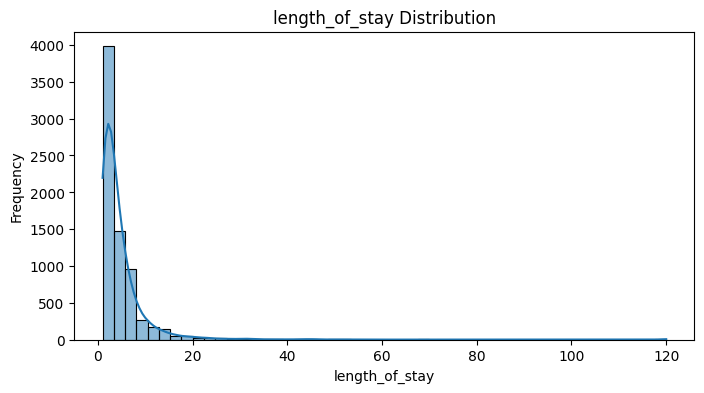

In [19]:
# histograms for continuous variables
for col in numeric_cols:
    plt.figure(figsize = (8, 4))
    sns.histplot(df_clean[col], kde = True, bins = 50)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

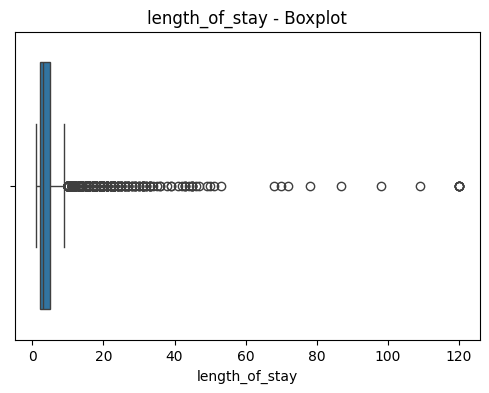

In [20]:
# boxplots for continuous variables
for col in numeric_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df_clean[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

In [21]:
# output for further analysis
df_clean.to_parquet('../data/temp/nystate_flu_discharges_2024.parquet', engine = "fastparquet", index = False)